In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [126]:
#import CSV file
vox2_meta = pd.read_csv('vox2_meta_eth.csv')

In [127]:
#see the data
vox2_meta

,Name,VoxCeleb2ID,VGGFace2,Gender,Set,Ethnicity
0,Aaron_Ashmore,id00012,n000012,m,dev,Caucasian Latin
1,Aaron_Motsoaledi,id00015,n000015,m,dev,African American
2,Aaron_Ramsey,id00016,n000016,m,dev,Caucasian Latin
3,Aaron_Rodgers,id00017,n000017,m,test,Caucasian Latin
4,Aaron_Schock,id00018,n000018,m,dev,Caucasian Latin
...,...,...,...,...,...,...
6109,Łukasz_Fabiański,id09263,n009263,m,dev,Caucasian Latin
6110,Šarūnas_Jasikevičius,id09268,n009268,m,dev,Caucasian Latin
6111,Štefan_Füle,id09269,n009269,m,dev,Caucasian Latin
6112,Željko_Obradović,id09271,n009271,m,dev,Caucasian Latin


In [128]:
#check data types
vox2_meta.dtypes

Name           object
VoxCeleb2ID    object
VGGFace2       object
Gender         object
Set            object
Ethnicity      object
dtype: object

In [129]:
#change data types to strings
vox2_meta[['Name', 'VoxCeleb2ID','VGGFace2','Gender','Set','Ethnicity']] = vox2_meta[['Name', 'VoxCeleb2ID','VGGFace2','Gender','Set','Ethnicity']].astype('string')
vox2_meta.dtypes

Name           string
VoxCeleb2ID    string
VGGFace2       string
Gender         string
Set            string
Ethnicity      string
dtype: object

In [130]:
#Pivote table to see ethnicity divided by gender
vox2_meta.pivot_table(columns = 'Gender', index = 'Ethnicity', values = 'Name', aggfunc='count')

Gender,f,m
Ethnicity,,
African American,161,394
Asian Indian,241,208
Caucasian Latin,1857,3031
East Asian,92,130


In [192]:
#group ethincity categories to count
ethnicity = vox2_meta.groupby(by='Ethnicity').count()['Name']
ethnicity

Ethnicity
African American     555
Asian Indian         449
Caucasian Latin     4888
East Asian           222
Name: Name, dtype: int64

In [201]:
#un_eth to find unique ethinicty categories
un_ethn = sorted(vox2_meta['Ethnicity'].unique())

#count_ethn to save the count as an array
count_ethn= np.array(ethnicity)

#perc_ethn to find the percentages of each category
total_e = vox2_meta['Ethnicity'].count()
perc_ethn = []

for i in un_ethn:
   perc_ethn.append(round((ethnicity[i]/total_e*100),2))

#create a data frame with the ethinicity, count and percentage
data_ethn = {'Ethnicity': un_ethn, 'Count':count_ethn, 'Percentage':perc_ethn}

df_ethn = pd.DataFrame(data_ethn)
df_ethn


,Ethnicity,Count,Percentage
0,African American,555,9.08
1,Asian Indian,449,7.34
2,Caucasian Latin,4888,79.95
3,East Asian,222,3.63


([<matplotlib.patches.Wedge at 0x20785635cd0>,
 [Text(1.0555724690529629, 0.3094620535339216, 'African American'),
  Text(0.765532506496409, 0.7899113757234577, 'Asian Indian'),
  Text(-1.0123859356363212, -0.4302031117109343, 'Caucasian Latin'),
  Text(1.0928509860921993, -0.12520671786013574, 'East Asian')],
 [Text(0.5757668013016161, 0.1687974837457754, '9.08'),
  Text(0.4175631853616776, 0.4308607503946133, '7.34'),
  Text(-0.5522105103470842, -0.23465624275141866, '79.95'),
  Text(0.5961005378684723, -0.06829457337825584, '3.63')])

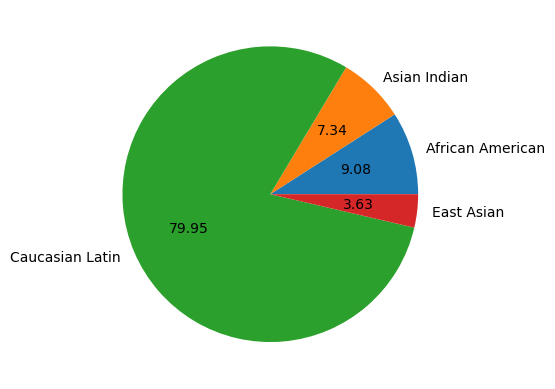

In [199]:
#Pie chart plot of the information
plt.pie(df_ethn['Count'],labels = df_ethn['Ethnicity'],autopct= '%.2f')

In [177]:
#group gender categories to count
gender = vox2_meta.groupby(by='Gender').count()['Name']

In [205]:
#un_gend to find unique gender categories
un_gend = sorted(vox2_meta['Gender'].unique())

#count_gend to save the count as an array
count_gend = np.array(gender)

#perc_gend to find the percentages of each category
total_g = vox2_meta['Gender'].count()
perc_gend = []

for i in un_gend:
   perc_gend.append(round((gender[i]/total_g*100),2))

#create a data frame with the gender, count and percentage
data_gend = {'Gender': un_gend, 'Count':count_gend, 'Percentage':perc_gend}

df_gend = pd.DataFrame(data_gend)
df_gend


,Gender,Count,Percentage
0,f,2351,38.45
1,m,3763,61.55


([<matplotlib.patches.Wedge at 0x207856ec580>,
 [Text(0.3903498956162055, 1.0284099177820183, 'f'),
  Text(-0.39034989561620514, -1.0284099177820185, 'm')],
 [Text(0.2129181248815666, 0.5609508642447372, '38.45'),
  Text(-0.21291812488156645, -0.5609508642447373, '61.55')])

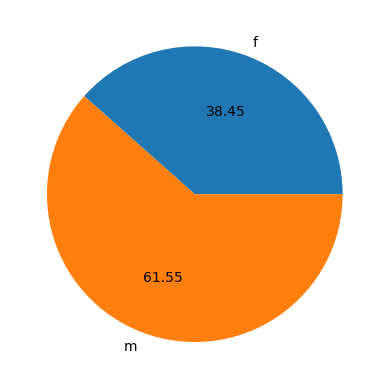

In [204]:
#Pie chart plot of the information
plt.pie(df_gend['Count'],labels = df_gend['Gender'],autopct= '%.2f')